In [1]:
import pandas as pd
import numpy as np
from fuzzywuzzy import fuzz
from fuzzywuzzy import process
import matplotlib.pyplot as plt
from statistics import mean
import math
import json

/usr/local/lib/python3.7/site-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [2]:
fuzz.token_set_ratio("ab cd efg", "efg cd ab")
fuzz.partial_ratio("ab cd efg", "efg cd ab")

47

In [3]:
file_name = "unseen_e2e_kgdial.csv"
df_seen_e2e_kgdial = pd.read_csv(file_name)
df_seen_e2e_kgdial = df_seen_e2e_kgdial.replace({np.nan: None})
df_seen_e2e_kgdial

,Unnamed: 0,topic,last_sentence,checked_sentence,eval_label,generated_sentence
0,0,Elvis Presley,Elvis Presley,Regarded as one of the most significant cultur...,Oh baby.... Elvis Presley is truly The King of...,i love listening to elvis presley ' s music . ...
1,1,Ireland,Ireland\nWhat do you know about ireland?,Ireland (; ; Ulster-Scots: ) is an island in t...,Are you referring to the island in the North A...,i know a few different species of ireland . th...
2,2,Archery,Archery\nI recently took up archery and I thin...,"Archery is the sport, practice or skill of usi...",Archery is a sport/skill of using a bow to pro...,i do not know much about it . i know it is use...
3,3,Chihuahua (dog),"Chihuahua (dog)\nI love chihuahuas, I have 2 o...",The Chihuahua () is the smallest breed of dog ...,Wow chihuahua are something else. Tiny and the...,i have a chihuahua named named after the frenc...
4,4,Motivation,Motivation,"Motivation is the reason for people's actions,...",What is your motivation for your actions relat...,i am a lawyer . i feel like i need to understa...
5,5,Hunting,Hunting,Hunting is the practice of killing or trapping...,I enjoy going out in the woods to hunt animals.,i love to hunt animals . they are so dangerous...
6,6,The Walking Dead (TV series),The Walking Dead (TV series),The Walking Dead is an American post-apocalypt...,The Walking Dead is a kewl post apocalyptic ho...,"i love the show "" the tv series "" the tv serie..."
7,7,Harry Potter,Harry Potter,Harry Potter is a series of fantasy novels wri...,"Harry Potter is a series of fantasy novels, do...","hi , i love harry potter . i read harry potter..."
8,8,Thierry Henry,Thierry Henry\nThierry Henry is one of my all ...,Thierry Daniel Henry (; born 17 August 1977) i...,He was good. he is a retired French professio...,"i have not , but i know he is a german profess..."
9,9,no_passages_used,Hunting,no_passages_used,"Ive been hunting now for about 8 years, its re...",i love to hunt animals . they are so dangerous...


In [4]:
l_ratio_checked_label = []
l_ratio_checked_generated = []
for index, row in df_seen_e2e_kgdial.iterrows():
    if not row["topic"]:
        l_ratio_checked_label.append(None)
        l_ratio_checked_generated.append(None)
        continue
    checked_sentence = row["checked_sentence"]
    eval_label = row["eval_label"]
    generated_sentence = row["generated_sentence"]
    l_ratio_checked_label.append(fuzz.token_set_ratio(checked_sentence, eval_label))
    l_ratio_checked_generated.append(fuzz.token_set_ratio(checked_sentence, generated_sentence))
df_seen_e2e_kgdial["ratio_checked_label"] = l_ratio_checked_label
df_seen_e2e_kgdial["ratio_checked_generated"] = l_ratio_checked_generated
df_seen_e2e_kgdial

,Unnamed: 0,topic,last_sentence,checked_sentence,eval_label,generated_sentence,ratio_checked_label,ratio_checked_generated
0,0,Elvis Presley,Elvis Presley,Regarded as one of the most significant cultur...,Oh baby.... Elvis Presley is truly The King of...,i love listening to elvis presley ' s music . ...,67.0,32.0
1,1,Ireland,Ireland\nWhat do you know about ireland?,Ireland (; ; Ulster-Scots: ) is an island in t...,Are you referring to the island in the North A...,i know a few different species of ireland . th...,67.0,51.0
2,2,Archery,Archery\nI recently took up archery and I thin...,"Archery is the sport, practice or skill of usi...",Archery is a sport/skill of using a bow to pro...,i do not know much about it . i know it is use...,100.0,38.0
3,3,Chihuahua (dog),"Chihuahua (dog)\nI love chihuahuas, I have 2 o...",The Chihuahua () is the smallest breed of dog ...,Wow chihuahua are something else. Tiny and the...,i have a chihuahua named named after the frenc...,74.0,74.0
4,4,Motivation,Motivation,"Motivation is the reason for people's actions,...",What is your motivation for your actions relat...,i am a lawyer . i feel like i need to understa...,58.0,45.0
5,5,Hunting,Hunting,Hunting is the practice of killing or trapping...,I enjoy going out in the woods to hunt animals.,i love to hunt animals . they are so dangerous...,43.0,42.0
6,6,The Walking Dead (TV series),The Walking Dead (TV series),The Walking Dead is an American post-apocalypt...,The Walking Dead is a kewl post apocalyptic ho...,"i love the show "" the tv series "" the tv serie...",85.0,57.0
7,7,Harry Potter,Harry Potter,Harry Potter is a series of fantasy novels wri...,"Harry Potter is a series of fantasy novels, do...","hi , i love harry potter . i read harry potter...",83.0,53.0
8,8,Thierry Henry,Thierry Henry\nThierry Henry is one of my all ...,Thierry Daniel Henry (; born 17 August 1977) i...,He was good. he is a retired French professio...,"i have not , but i know he is a german profess...",88.0,35.0
9,9,no_passages_used,Hunting,no_passages_used,"Ive been hunting now for about 8 years, its re...",i love to hunt animals . they are so dangerous...,11.0,27.0


In [5]:
dic_topic = {}
for index, row in df_seen_e2e_kgdial.iterrows():
    if not row["topic"] or row["topic"] == "no_passages_used":
        continue
    if row["topic"] not in dic_topic:
        dic_topic[row["topic"]] = 1
    else:
        dic_topic[row["topic"]] +=1
l_count_topic = {}
for key,val in dic_topic.items():
    if val not in l_count_topic:
        l_count_topic[val] = 1
    else:
        l_count_topic[val] += 1
if file_name == "train_e2e_kgdial.csv":
    with open('training_dic_topic.json', 'w') as fp:
        json.dump(dic_topic, fp)
    fp.close()
else:
    fp = open('training_dic_topic.json',)
    dic_topic = json.load(fp)
    fp.close()
# l_count_topic
{k: v for k, v in sorted(dic_topic.items(), key=lambda item: item[1], reverse=True)}

{'Pizza': 919,
 'Dog': 603,
 'Blue': 540,
 'Veganism': 493,
 'Cat': 452,
 'Vegetarianism': 355,
 'Reading (process)': 354,
 'Swimming': 339,
 'New York City': 333,
 "McDonald's": 319,
 'Red hair': 294,
 'Hiking': 291,
 'Cooking': 283,
 'Night owl (person)': 267,
 'Parenting': 250,
 'Divorce': 247,
 'Yoga': 245,
 'Surfing': 243,
 'Chocolate': 240,
 'Steak': 236,
 'Armadillo': 236,
 'Golden Retriever': 225,
 'Heavy metal music': 222,
 'Florida': 222,
 'Sushi': 221,
 'Purple': 214,
 'Italian cuisine': 207,
 'Taco': 207,
 'Game of Thrones': 206,
 'Beach': 203,
 'The Beatles': 196,
 'Piano': 194,
 'Animal shelter': 194,
 'Gardening': 183,
 'Hamburger': 181,
 'Association football': 179,
 'Guitar': 179,
 'Ice cream': 172,
 'Drawing': 172,
 'Yellow': 172,
 'Country music': 171,
 'Ketogenic diet': 169,
 'Skateboarding': 167,
 'Honda Civic': 166,
 'Husky': 160,
 'Rose': 157,
 'Basketball': 155,
 'Tattoo': 151,
 'Violin': 151,
 'Only child': 150,
 'Coffee': 150,
 'Tennis': 144,
 'Chevrolet Corve

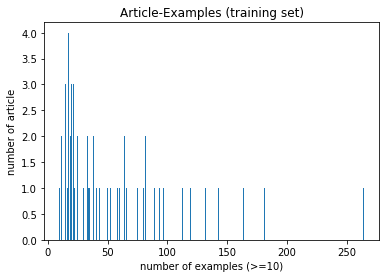

566


In [6]:
plt_x = []
plt_y = []
count = 0
for key,val in l_count_topic.items():
    if key < 10:
        count += val
        continue
    plt_x.append(key)
    plt_y.append(val)
plt.bar(plt_x,plt_y)
plt.title("Article-Examples (training set)");
plt.xlabel("number of examples (>=10)");
plt.ylabel("number of article");
plt.show()
print(count)

In [7]:
# plt_x = [10,20,30,40,50,60,70,80,90,100]
checked_eval = {10:0,20:0,30:0,40:0,50:0,60:0,70:0,80:0,90:0,100:0}
checked_gen = {10:0,20:0,30:0,40:0,50:0,60:0,70:0,80:0,90:0,100:0}
sum_checked_eval = 0
sum_checked_gen = 0
count = 0 
for index, row in df_seen_e2e_kgdial.iterrows():
    if not row["topic"] or row["topic"] == "no_passages_used":
        continue
    eval_value = math.ceil(row["ratio_checked_label"]/10)*10
    if eval_value == 0:
        eval_value = 10
    gen_value = math.ceil(row["ratio_checked_generated"]/10)*10
    if gen_value == 0:
        gen_value = 10
    checked_eval[eval_value] += 1
    checked_gen[gen_value] += 1
    sum_checked_eval += row["ratio_checked_label"]
    sum_checked_gen += row["ratio_checked_generated"]
    count += 1
print(count)
print(sum_checked_eval/count)
print(checked_eval)
print(sum_checked_gen/count)
print(checked_gen)

3716
69.13778256189451
{10: 0, 20: 4, 30: 40, 40: 193, 50: 441, 60: 581, 70: 638, 80: 637, 90: 647, 100: 535}
37.6275565123789
{10: 13, 20: 267, 30: 1030, 40: 1248, 50: 573, 60: 292, 70: 107, 80: 78, 90: 51, 100: 57}


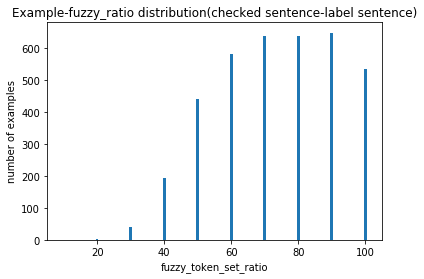

In [8]:
plt_x = []
plt_y = []
for key,val in checked_eval.items():
    plt_x.append(key)
    plt_y.append(val)
plt.bar(plt_x,plt_y)
plt.title("Example-fuzzy_ratio distribution(checked sentence-label sentence)");
plt.xlabel("fuzzy_token_set_ratio");
plt.ylabel("number of examples");
plt.show()

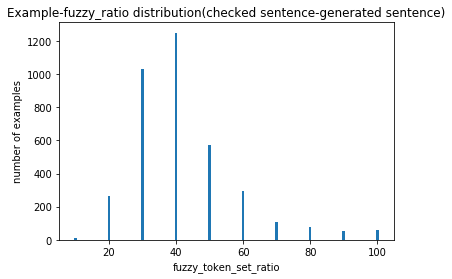

In [9]:
plt_x = []
plt_y = []
for key,val in checked_gen.items():
    plt_x.append(key)
    plt_y.append(val)
plt.bar(plt_x,plt_y)
plt.title("Example-fuzzy_ratio distribution(checked sentence-generated sentence)");
plt.xlabel("fuzzy_token_set_ratio");
plt.ylabel("number of examples");
plt.show()

In [10]:
dic_topic_checked_eval_ratio = {}
dic_topic_checked_gen_ratio = {}
for index, row in df_seen_e2e_kgdial.iterrows():
    if not row["topic"] or row["topic"] == "no_passages_used":
        continue
    if row["topic"] not in dic_topic_checked_eval_ratio:
        dic_topic_checked_eval_ratio[row["topic"]] = [row["ratio_checked_label"]]
    else:
        dic_topic_checked_eval_ratio[row["topic"]].append(row["ratio_checked_label"])
    if row["topic"] not in dic_topic_checked_gen_ratio:
        dic_topic_checked_gen_ratio[row["topic"]] = [row["ratio_checked_generated"]]
    else:
        dic_topic_checked_gen_ratio[row["topic"]].append(row["ratio_checked_generated"])
for key,val in dic_topic_checked_eval_ratio.items():
    dic_topic_checked_eval_ratio[key] = mean(val)
for key,val in dic_topic_checked_gen_ratio.items():
    dic_topic_checked_gen_ratio[key] = mean(val)
print(dic_topic_checked_eval_ratio)
print(dic_topic_checked_gen_ratio)

{'Elvis Presley': 67.60773480662984, 'Ireland': 76.0, 'Archery': 75.17241379310344, 'Chihuahua (dog)': 64.6470588235294, 'Motivation': 67.73076923076923, 'Hunting': 71.38709677419355, 'The Walking Dead (TV series)': 68.76829268292683, 'Harry Potter': 68.73484848484848, 'Thierry Henry': 72.70588235294117, 'Broken heart': 72.75, 'List of national parks of the United States': 71.13333333333334, 'Discovery Channel': 74.76923076923077, 'American football': 71.23776223776224, "Guns N' Roses": 69.04878048780488, 'Nickelback': 67.09375, 'Bowling': 68.86585365853658, 'Skiing': 69.4873949579832, 'On-again, off-again relationship': 58.714285714285715, "Dylan's Candy Bar": 76.18333333333334, 'Game design': 69.29411764705883, 'Popcorn': 72.15151515151516, 'Cod': 68.26315789473684, 'Green': 76.63257575757575, 'Medical billing': 66.76, 'Cheerleading': 67.8141592920354, 'Instagram': 70.08247422680412, 'Japanese language': 60.473684210526315, 'Cardigan (sweater)': 70.95454545454545, 'Paramedic': 69.325

In [11]:
dic_example_topic_checked_eval_ratio = {}
dic_example_topic_checked_gen_ratio = {}
for key,val in dic_topic_checked_eval_ratio.items():
    if key not in dic_topic:
        dic_topic[key] = 0
    if dic_topic[key] not in dic_example_topic_checked_eval_ratio:
        dic_example_topic_checked_eval_ratio[dic_topic[key]] = [val]
    else:
        dic_example_topic_checked_eval_ratio[dic_topic[key]].append(val)

for key,val in dic_topic_checked_gen_ratio.items():
    if key not in dic_topic:
        dic_topic[key] = 0
    if dic_topic[key] not in dic_example_topic_checked_gen_ratio:
        dic_example_topic_checked_gen_ratio[dic_topic[key]] = [val]
    else:
        dic_example_topic_checked_gen_ratio[dic_topic[key]].append(val)

for key,val in dic_example_topic_checked_eval_ratio.items():
    dic_example_topic_checked_eval_ratio[key] = mean(val)
    
for key,val in dic_example_topic_checked_gen_ratio.items():
    dic_example_topic_checked_gen_ratio[key] = mean(val)
    
print(dic_example_topic_checked_eval_ratio)
print(dic_example_topic_checked_gen_ratio)

{9: 61.30386740331492, 1: 61.98605528537218, 0: 65.25607110164628, 2: 59.190973578812056, 4: 66.88942307692308, 6: 58.729671243390754, 16: 65.47537878787878, 5: 55.65973218555715, 7: 47.66470588235294, 23: 79.5, 3: 62.1563048245614, 109: 69.0, 14: 61.47222222222222, 22: 61.5, 47: 42.666666666666664, 245: 43.0, 8: 74.875, 10: 55.635714285714286, 91: 54.0, 603: 56.666666666666664, 21: 57.0, 18: 39.166666666666664, 181: 36.5, 493: 38.0, 37: 50.5, 41: 66.0, 51: 82.16666666666667, 11: 51.44444444444444, 35: 86.0, 53: 58.0, 27: 46.5, 39: 96.0, 17: 55.0, 68: 46.5, 50: 80.0, 355: 60.6, 26: 68.45454545454545, 540: 53.5, 94: 76.0, 59: 80.0, 169: 41.0, 74: 44.0, 222: 50.0, 55: 77.0, 33: 36.0, 99: 47.0, 44: 50.0, 31: 68.0, 13: 81.0}
{9: 48.57734806629834, 1: 37.52508558054131, 0: 34.36564534793394, 2: 37.97175318268901, 4: 36.9375, 6: 42.74696543294104, 16: 43.452651515151516, 5: 36.1635581061693, 7: 36.95294117647059, 23: 47.0, 3: 34.87702850877193, 109: 50.0, 14: 41.138888888888886, 22: 27.75, 4

[9, 1, 0, 2, 4, 6, 16, 5, 7, 23, 3, 109, 14, 22, 47, 245, 8, 10, 91, 603, 21, 18, 181, 493, 37, 41, 51, 11, 35, 53, 27, 39, 17, 68, 50, 355, 26, 540, 94, 59, 169, 74, 222, 55, 33, 99, 44, 31, 13]
[61.30386740331492, 61.98605528537218, 65.25607110164628, 59.190973578812056, 66.88942307692308, 58.729671243390754, 65.47537878787878, 55.65973218555715, 47.66470588235294, 79.5, 62.1563048245614, 69.0, 61.47222222222222, 61.5, 42.666666666666664, 43.0, 74.875, 55.635714285714286, 54.0, 56.666666666666664, 57.0, 39.166666666666664, 36.5, 38.0, 50.5, 66.0, 82.16666666666667, 51.44444444444444, 86.0, 58.0, 46.5, 96.0, 55.0, 46.5, 80.0, 60.6, 68.45454545454545, 53.5, 76.0, 80.0, 41.0, 44.0, 50.0, 77.0, 36.0, 47.0, 50.0, 68.0, 81.0]


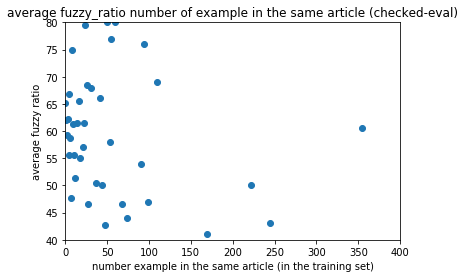

In [12]:
plt_x = []
plt_y = []
for key,val in dic_example_topic_checked_eval_ratio.items():
    plt_x.append(key)
    plt_y.append(val)
print(plt_x)
print(plt_y)
plt.scatter(plt_x,plt_y)
plt.ylim(40, 80)
plt.xlim(0, 400)
plt.title("average fuzzy_ratio number of example in the same article (checked-eval)");
plt.xlabel("number example in the same article (in the training set)");
plt.ylabel("average fuzzy ratio");
plt.show()

[9, 1, 0, 2, 4, 6, 16, 5, 7, 23, 3, 109, 14, 22, 47, 245, 8, 10, 91, 603, 21, 18, 181, 493, 37, 41, 51, 11, 35, 53, 27, 39, 17, 68, 50, 355, 26, 540, 94, 59, 169, 74, 222, 55, 33, 99, 44, 31, 13]
[48.57734806629834, 37.52508558054131, 34.36564534793394, 37.97175318268901, 36.9375, 42.74696543294104, 43.452651515151516, 36.1635581061693, 36.95294117647059, 47.0, 34.87702850877193, 50.0, 41.138888888888886, 27.75, 29.333333333333332, 41.0, 29.333333333333332, 35.57142857142857, 41.5, 30.0, 57.166666666666664, 34.666666666666664, 33.5, 35.0, 88.5, 29.0, 40.666666666666664, 29.77777777777778, 78.0, 85.0, 32.0, 50.0, 42.888888888888886, 59.5, 54.0, 32.6, 33.18181818181818, 59.0, 53.0, 35.0, 81.0, 82.0, 90.5, 58.0, 14.0, 31.0, 49.5, 39.0, 30.0]


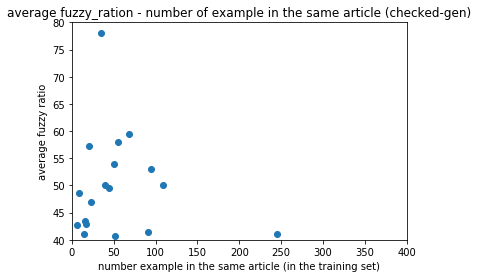

In [13]:
plt_x = []
plt_y = []
for key,val in dic_example_topic_checked_gen_ratio.items():
    plt_x.append(key)
    plt_y.append(val)
print(plt_x)
print(plt_y)
plt.ylim(40, 80)
plt.xlim(0, 400)
plt.scatter(plt_x,plt_y)
plt.title("average fuzzy_ration - number of example in the same article (checked-gen)");
plt.xlabel("number example in the same article (in the training set)");
plt.ylabel("average fuzzy ratio");
plt.show()